<a href="https://colab.research.google.com/github/kavicastelo/colab/blob/google/fertilizer_soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [73]:
df = pd.read_csv('/content/sample_data/Fertilizer_Soil_Data.csv')

In [74]:
# Look at all the rows of the dataframe
display(df)

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
0,28.2,65.1,48.3,6.7,25.8,15.3,10.7,20.1,30.5,Wheat,41.2
1,30.5,68.4,46.8,6.9,27.2,16.1,11.2,23.4,34.2,Rice,53.8
2,27.8,63.2,50.5,6.5,24.9,13.7,10.2,19.8,29.7,Corn,31.9
3,31.3,73.2,41.7,6.8,28.7,18.2,13.9,25.2,38.1,Soybean,46.7
4,29.6,67.7,47.2,6.6,26.5,14.6,10.9,22.3,32.6,Barley,38.5
...,...,...,...,...,...,...,...,...,...,...,...
208,30.1,68.0,45.2,6.8,27.5,15.5,11.5,23.5,34.0,Rice,51.8
209,28.8,63.0,49.0,6.5,26.8,14.8,10.2,20.8,30.9,Corn,34.1
210,29.6,71.8,43.5,6.7,28.3,17.5,12.5,24.2,37.0,Soybean,46.5
211,27.7,64.2,48.5,6.4,26.3,13.5,10.0,21.0,31.0,Barley,39.2


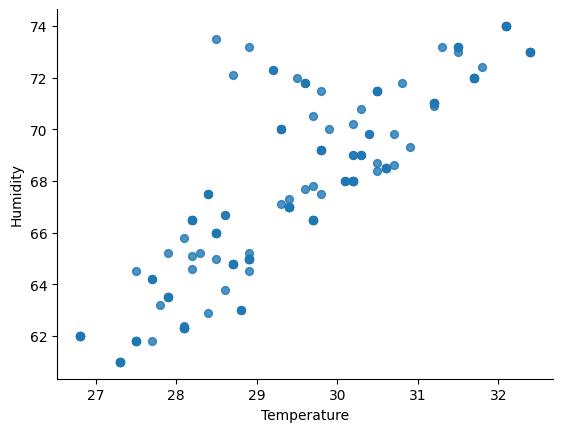

In [75]:
# @title Temperature vs Humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
# Get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        213 non-null    float64
 1   Humidity           213 non-null    float64
 2   Rainfall           213 non-null    float64
 3   Soil_pH            213 non-null    float64
 4   Soil_Moisture      213 non-null    float64
 5   Nitrogen_Level     213 non-null    float64
 6   Phosphorus_Level   213 non-null    float64
 7   Potassium_Level    213 non-null    float64
 8   Fertilizer_Amount  213 non-null    float64
 9   Crop_Type          213 non-null    object 
 10  Crop_Yield         213 non-null    float64
dtypes: float64(10), object(1)
memory usage: 18.4+ KB
None


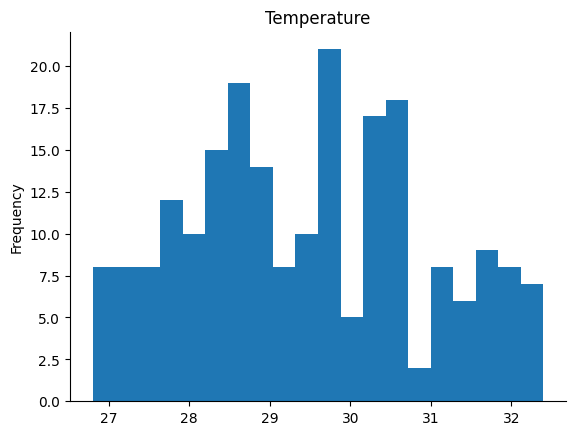

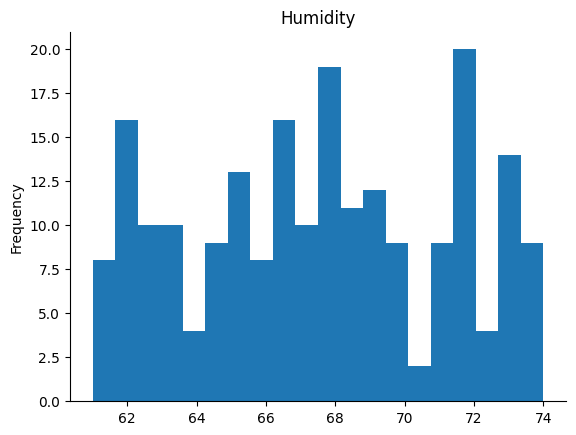

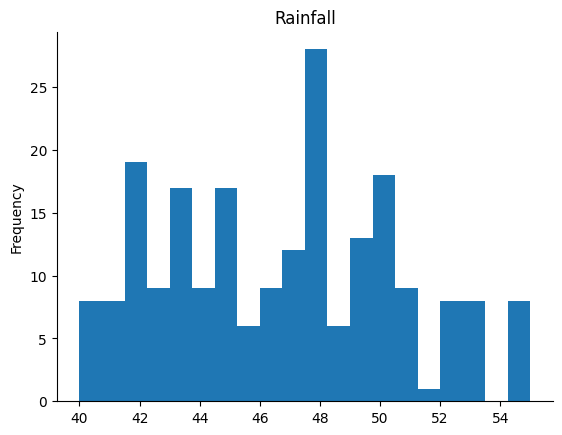

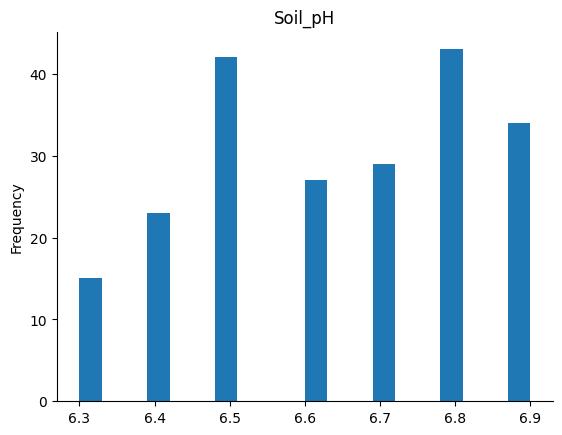

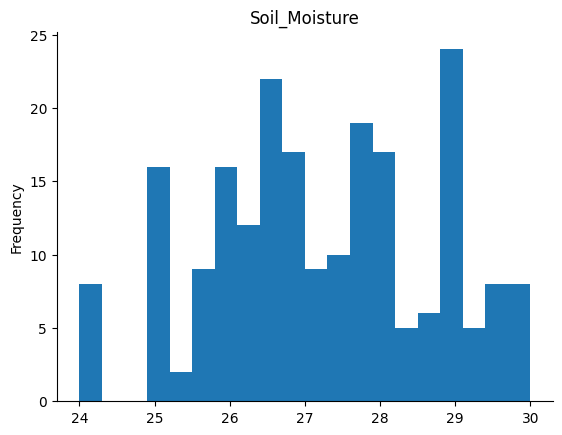

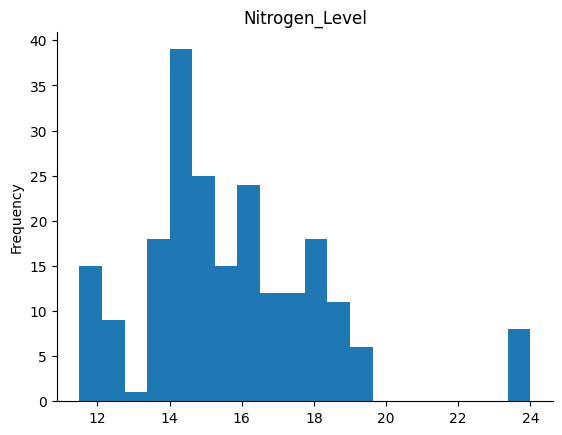

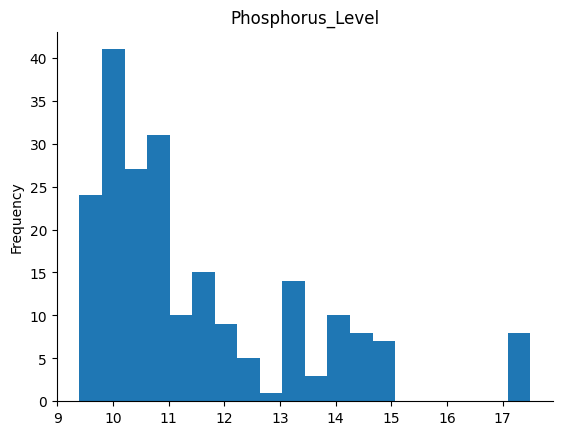

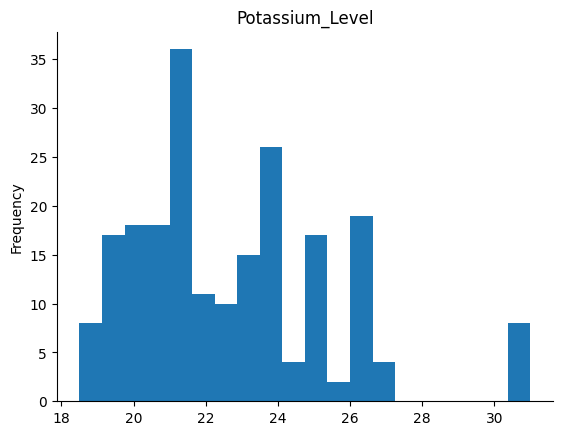

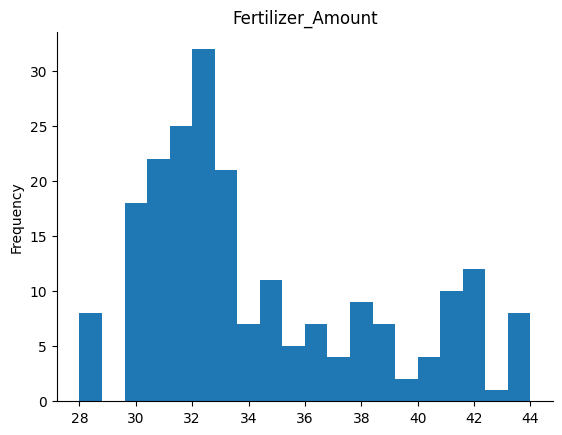

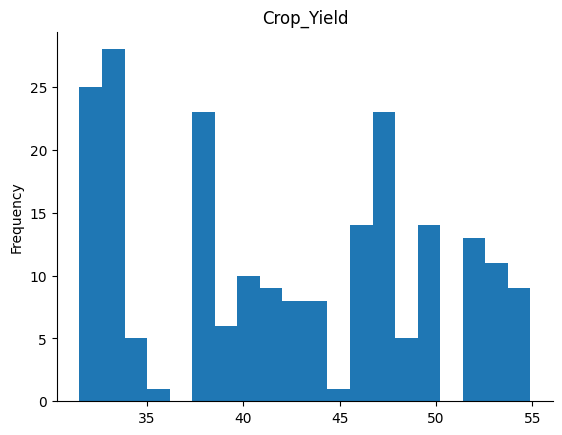

In [77]:
# @title Hist Plots without removing duplicates

factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount', 'Crop_Yield']

# Convert non-numeric columns to numeric if necessary
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot histograms for numeric columns
for factor in factors:
    df[factor].plot(kind='hist', bins=20, title=factor)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

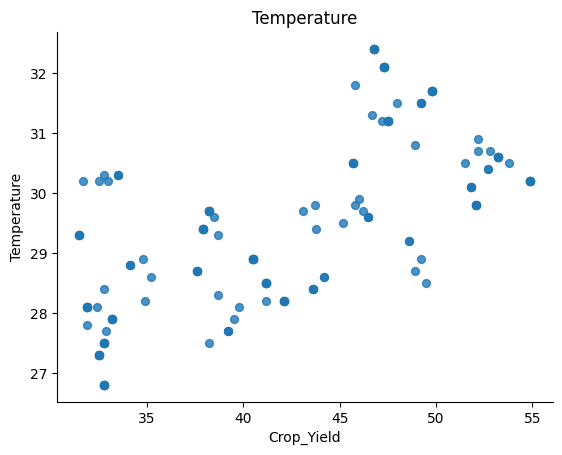

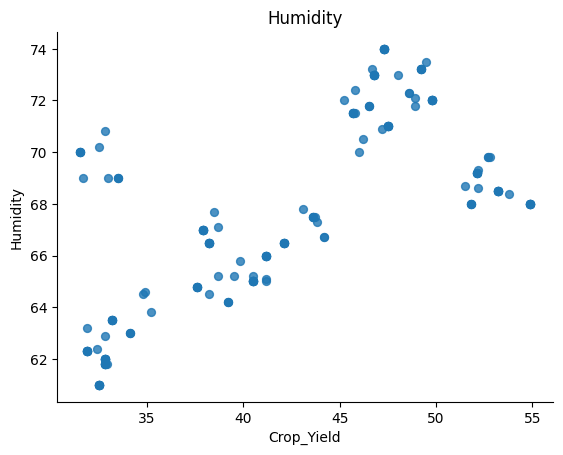

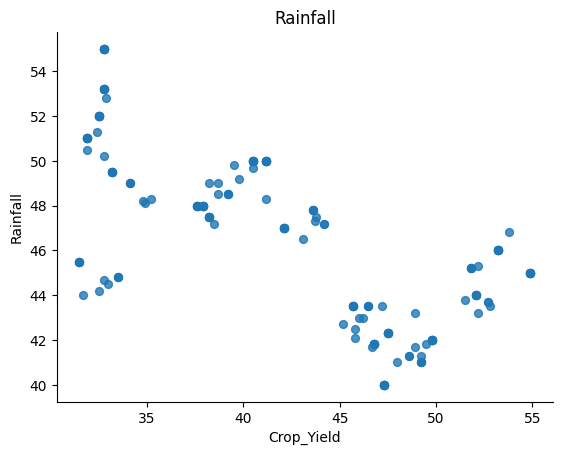

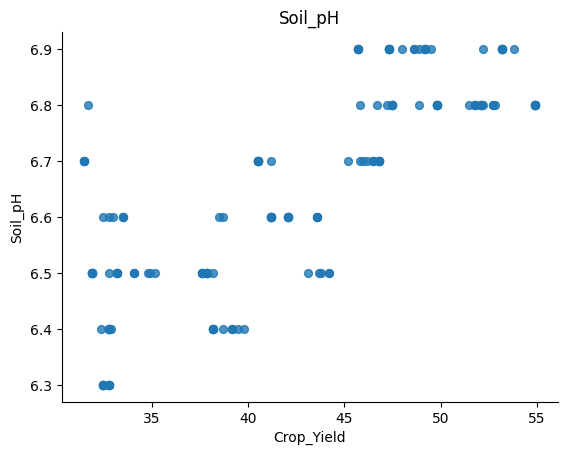

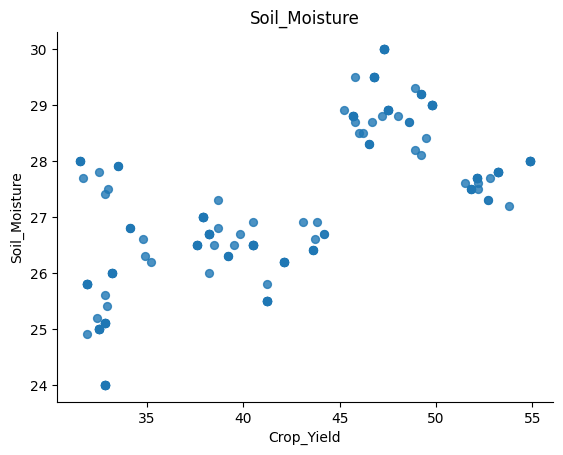

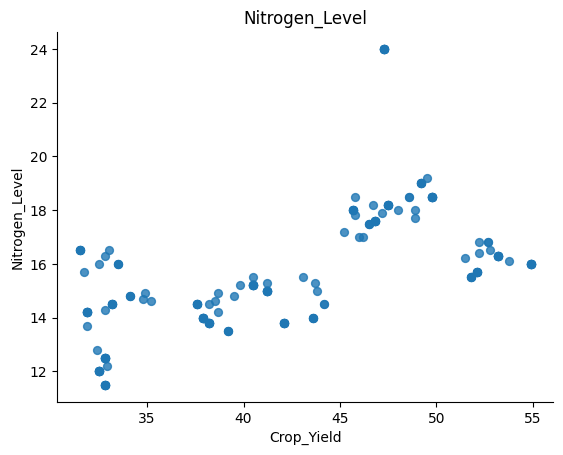

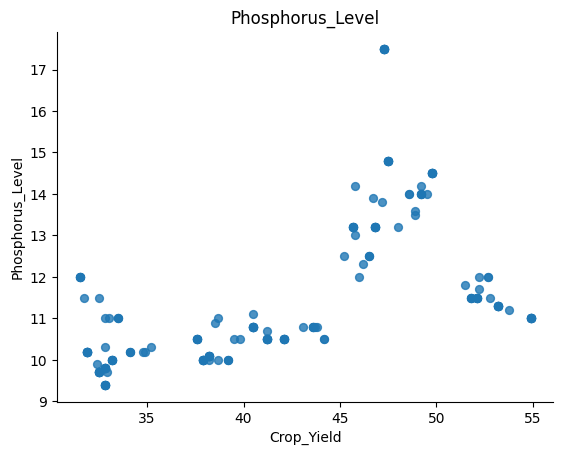

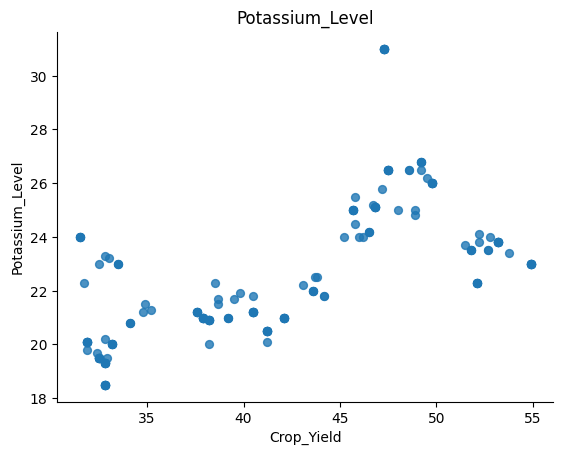

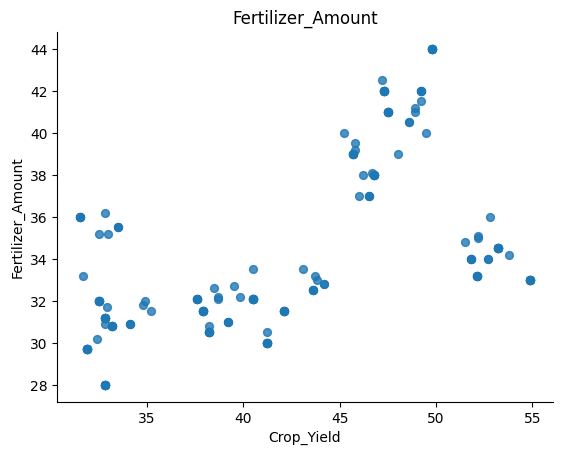

In [78]:
# @title Scatter Plots before removing duplicates

factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount']

for factor in factors:
  df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [79]:
# Detecting duplicates
duplicates = df[df.duplicated()]
duplicates

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
29,30.2,68.0,45.0,6.8,28.0,16.0,11.0,23.0,33.0,NaN,54.9
30,26.8,62.0,55.0,6.4,24.0,12.5,9.8,18.5,28.0,NaN,32.8
31,32.1,74.0,40.0,6.9,30.0,24.0,17.5,31.0,42.0,NaN,47.3
32,29.4,67.0,48.0,6.5,27.0,14.0,10.0,21.0,31.5,NaN,37.9
33,27.3,61.0,52.0,6.3,25.0,12.0,9.7,19.5,32.0,NaN,32.5
...,...,...,...,...,...,...,...,...,...,...,...
208,30.1,68.0,45.2,6.8,27.5,15.5,11.5,23.5,34.0,NaN,51.8
209,28.8,63.0,49.0,6.5,26.8,14.8,10.2,20.8,30.9,NaN,34.1
210,29.6,71.8,43.5,6.7,28.3,17.5,12.5,24.2,37.0,NaN,46.5
211,27.7,64.2,48.5,6.4,26.3,13.5,10.0,21.0,31.0,NaN,39.2


In [80]:
df.drop_duplicates(duplicates)

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
0,28.2,65.1,48.3,6.7,25.8,15.3,10.7,20.1,30.5,NaN,41.2
1,30.5,68.4,46.8,6.9,27.2,16.1,11.2,23.4,34.2,NaN,53.8
2,27.8,63.2,50.5,6.5,24.9,13.7,10.2,19.8,29.7,NaN,31.9
3,31.3,73.2,41.7,6.8,28.7,18.2,13.9,25.2,38.1,NaN,46.7
4,29.6,67.7,47.2,6.6,26.5,14.6,10.9,22.3,32.6,NaN,38.5
...,...,...,...,...,...,...,...,...,...,...,...
181,28.1,65.8,49.2,6.4,26.7,15.2,10.5,21.9,32.2,NaN,39.8
182,30.3,70.8,44.7,6.6,27.4,16.3,11.0,23.3,36.2,NaN,32.8
183,28.9,73.2,41.3,6.9,28.1,19.0,14.2,26.5,41.5,NaN,49.2
184,29.8,67.5,47.3,6.5,26.6,15.3,10.8,22.5,33.2,NaN,43.7


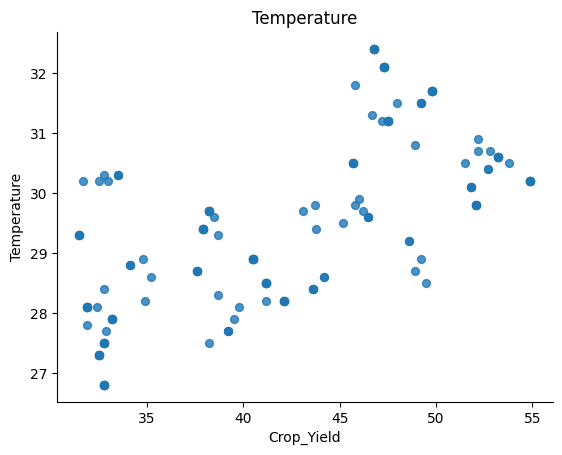

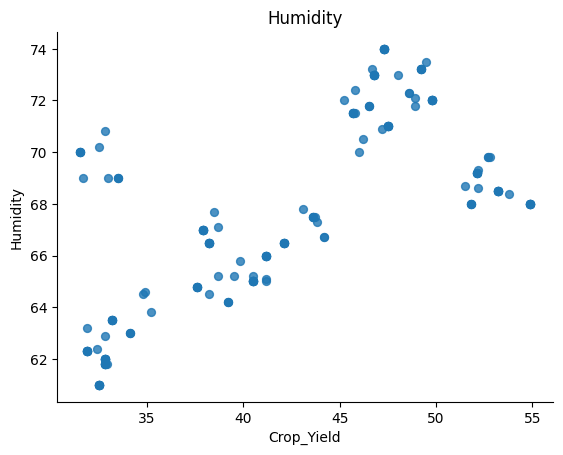

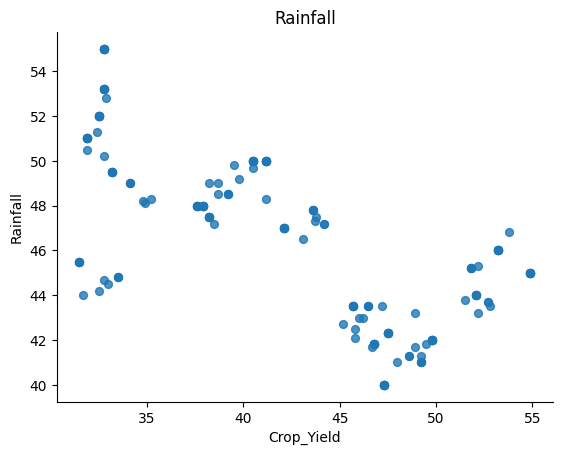

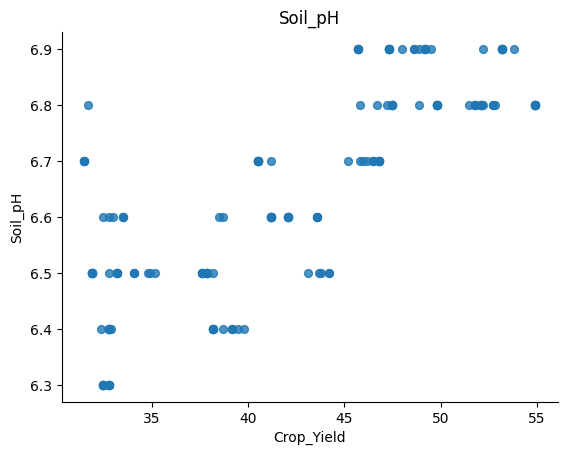

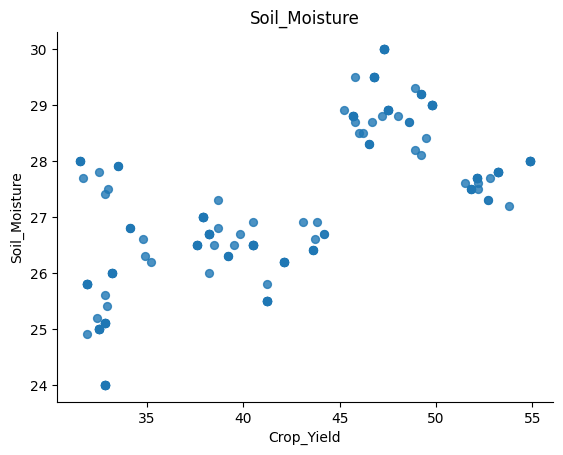

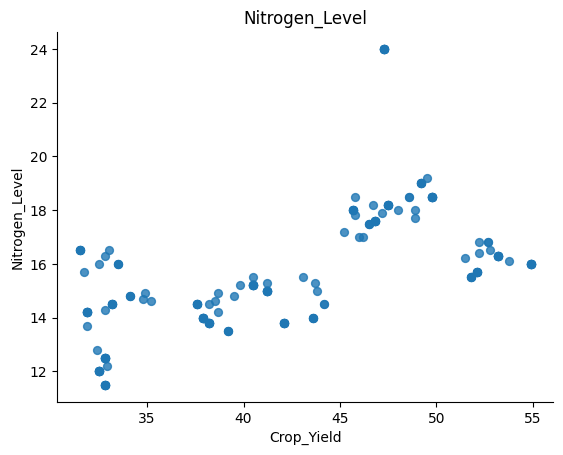

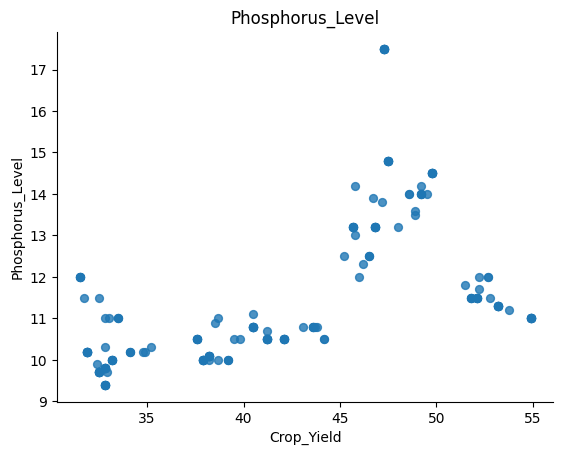

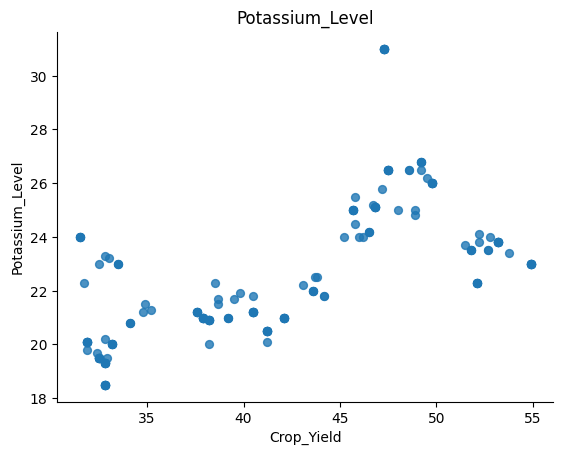

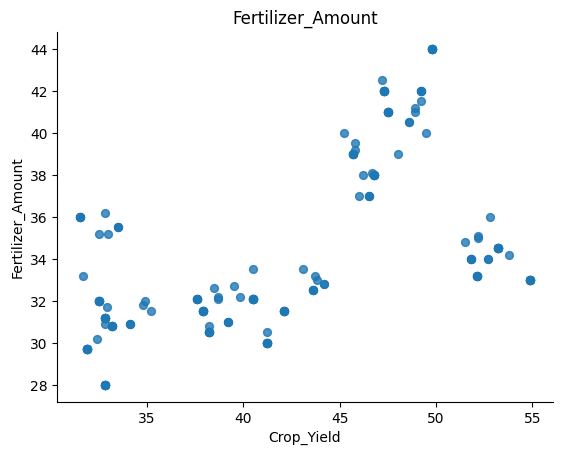

In [81]:
# @title Scatter Plots after removing duplicates

factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount']

for factor in factors:
  df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
  plt.gca().spines[['top', 'right',]].set_visible(False)

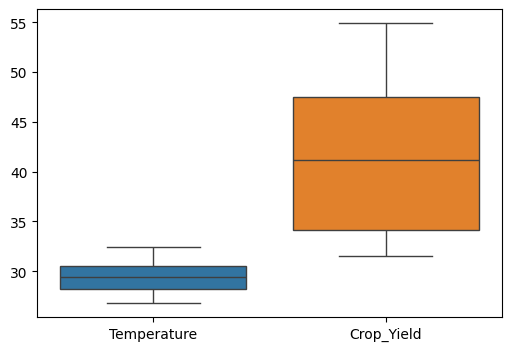

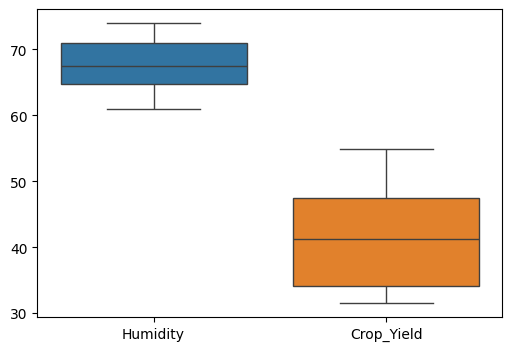

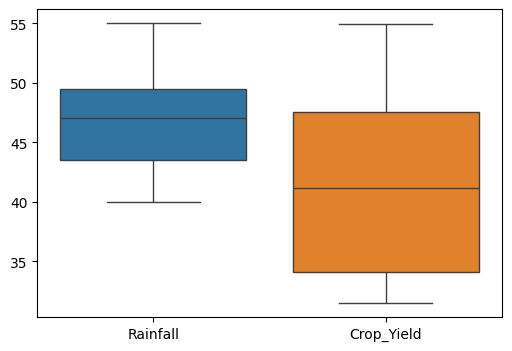

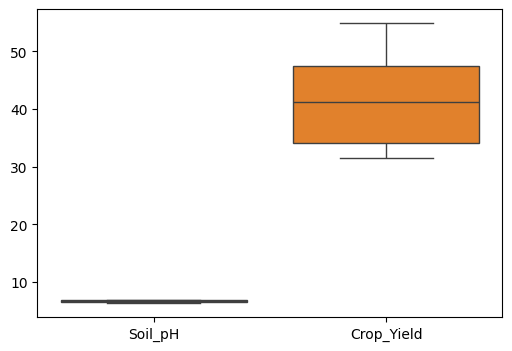

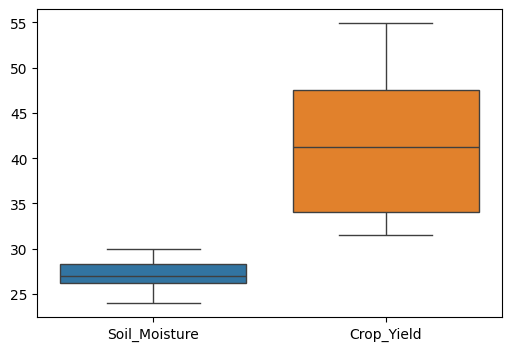

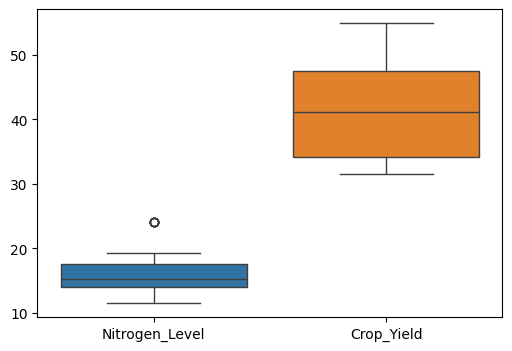

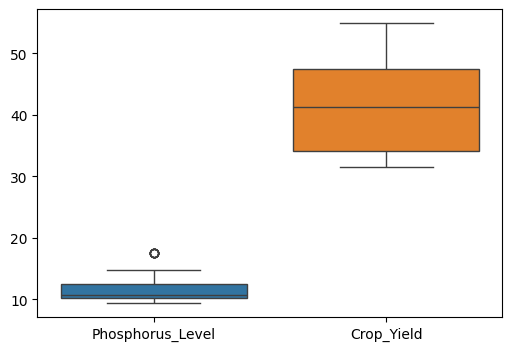

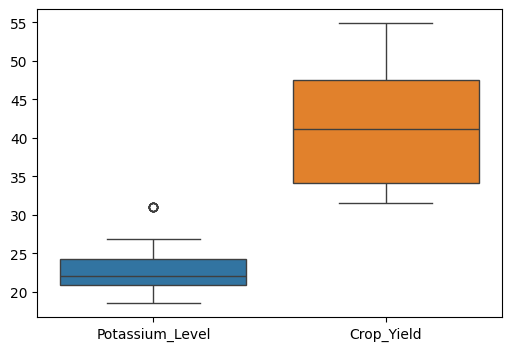

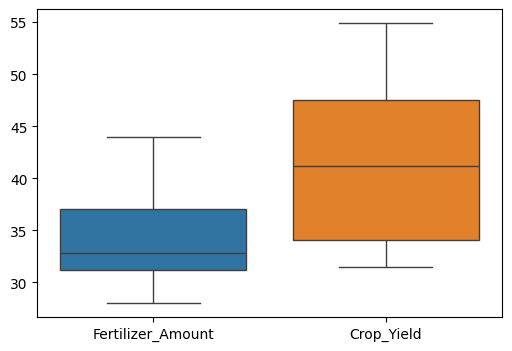

In [82]:
# @title Box Plots after removing duplicates

factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount']

for factor in factors:
  plt.figure(figsize=(6, 4))
  sns.boxplot(data=df[[factor, 'Crop_Yield']])

In [83]:
factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount']

for factor in factors:
  Q1 = df[factor].quantile(0.25)
  Q3 = df[factor].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[factor] < (Q1 - 1.5 * IQR)) |(df[factor] > (Q3 + 1.5 * IQR)))]

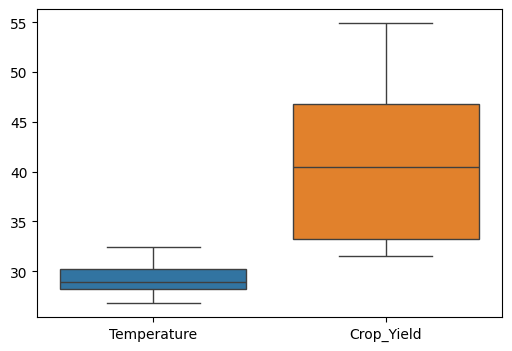

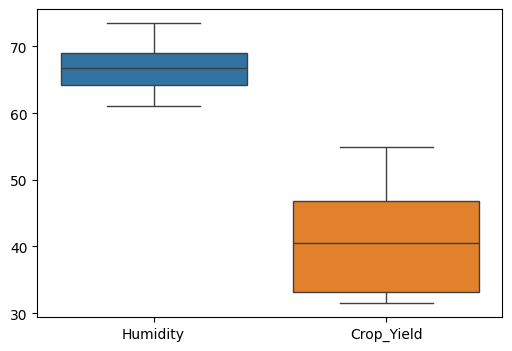

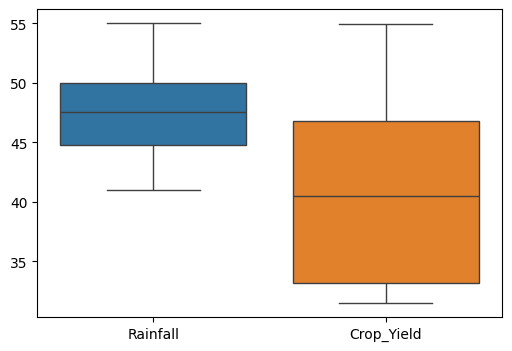

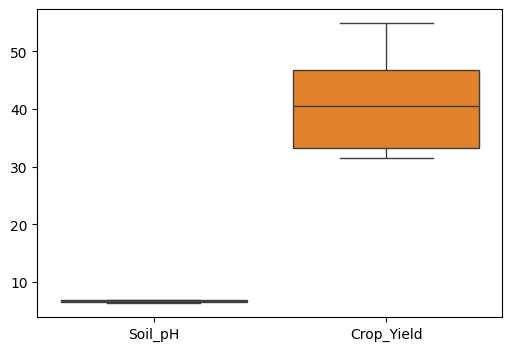

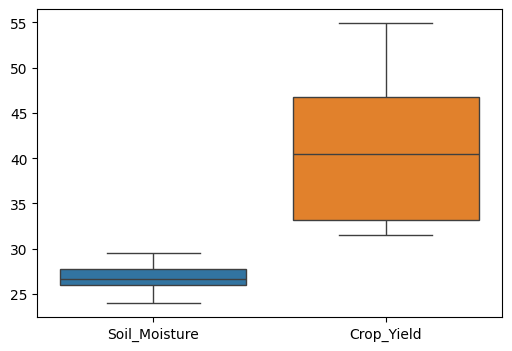

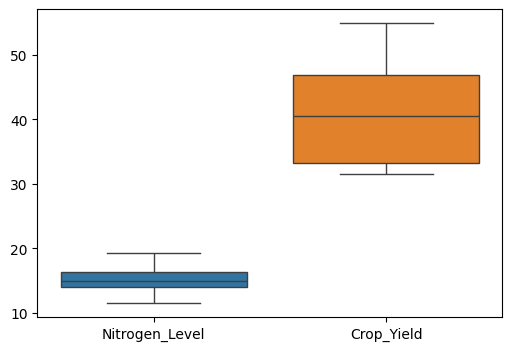

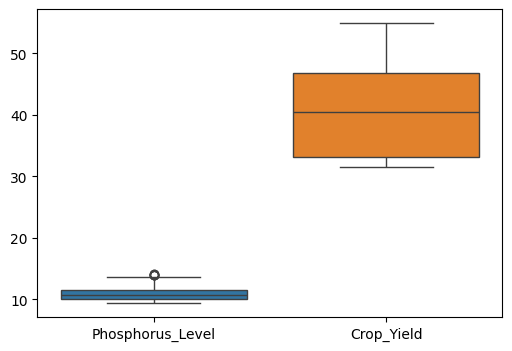

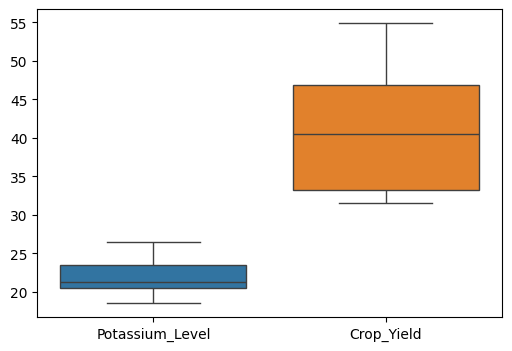

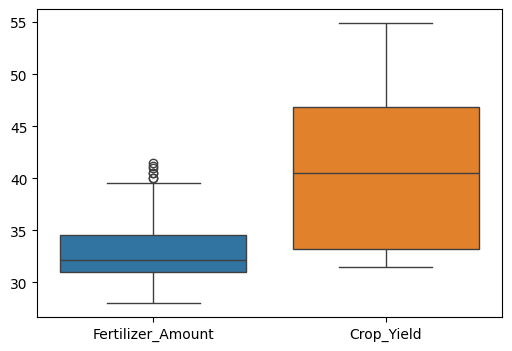

In [84]:
# @title Box Plots after removing outliers

factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount']

for factor in factors:
  plt.figure(figsize=(6, 4))
  sns.boxplot(data=df[[factor, 'Crop_Yield']])

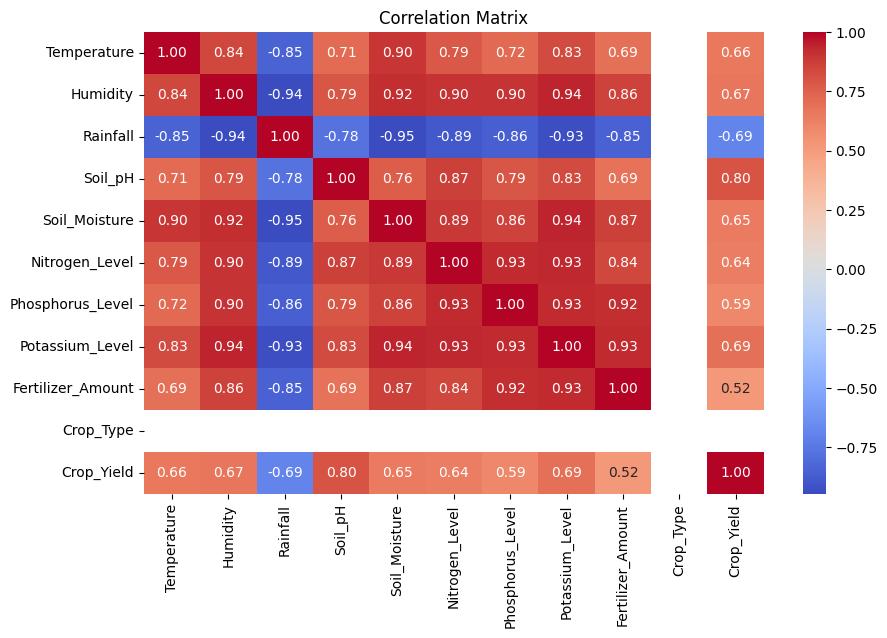

In [85]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' , fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [86]:
df.to_csv('/content/Data_clean.csv')